#### Name:

# Laboratory Experiment # 001: Digital Modulation Techniques

Question: Why can’t we directly transmit the Ethernet signal shown in the figure above? There are many reasons, the biggest two being:

1. Low frequencies require huge antennas, and the signal above contains frequencies down to DC (0 Hz). We can’t transmit DC.
2. Square waves take an excessive amount of spectrum for the bits per second–recall from the Frequency Domain chapter that sharp changes in time domain use a large amount of bandwidth/spectrum:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.repeat(np.arange(10) % 2, 20) * 2 - 1
y = y.astype(float)
Y = np.abs(np.fft.rfft(y, 10000))
print(Y)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
plt.subplots_adjust(wspace=0.4)

# Plot stuff
ax1.plot(y)
ax1.text(len(y) + 10, -0.05, 'Time')
ax1.set_ylabel("Amplitude")

ax2.plot(Y)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Magnitude")

# set the x-spine (see below for more info on `set_position`)
ax1.spines['left'].set_position('zero')
ax2.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax1.spines['right'].set_color('none')
ax1.yaxis.tick_left()
ax2.spines['right'].set_color('none')
ax2.yaxis.tick_left()

# set the y-spine
ax1.spines['bottom'].set_position('zero')
ax2.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax1.spines['top'].set_color('none')
ax1.xaxis.tick_bottom()
ax2.spines['top'].set_color('none')
ax2.xaxis.tick_bottom()

# Turn off tick numbering/labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

plt.show()

What we do for wireless signals is start with a carrier, which is just a sinusoid. E.g., FM radio uses a carrier like 101.1 MHz or 100.3 MHz. We modulate that carrier in some way (there are many). For FM radio it’s an analog modulation, not digital, but it’s the same concept as digital modulation.

In what ways can we modulate the carrier? Another way to ask the same question: what are the different properties of a sinusoid?
1. Amplitude
2. Phase
3. Frequency
We can modulate our data onto a carrier by modifying any one (or more) of these three.

## Amplitude Shift Keying (ASK)

Amplitude Shift Keying (ASK) is the first digital modulation scheme we will discuss because amplitude modulation is the simplest to visualize of the three sinusoid properties. We literally modulate the amplitude of the carrier. Here is an example of 2-level ASK, called 2-ASK:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
fig.subplots_adjust(hspace=0.4)

t = np.arange(0,2,0.001)
symbols = (np.random.randint(0,2,20)+1)
train = np.repeat(symbols, 100)
ax1.plot(t,train)
ax1.set_title("Our Data")
ax1.set_ylabel("Amplitude")
ax1.set_ylim(bottom=0.5, top=2.5)
ax1.set_xlim(left=0, right=2)
for i, symbol in enumerate(symbols):
    ax1.text(i/10+0.035, 2.1, str(symbol-1), fontsize=14, color='red')

f = 25
x = np.sin(2*np.pi*f*t)*train
ax2.plot(t,x)
ax2.set_title("Wireless Signal")
ax2.set_xlabel("Time")
ax2.set_ylabel("Amplitude")
ax2.set_xlim(left=0, right=2)

plt.show()

Note how the average value is zero; we always prefer this whenever possible.

We can use more than two levels, allowing for more bits per symbol. Below shows an example of 4-ASK (off is one of the four levels). In this case each symbol carries 2 bits of information.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 3))
fig.subplots_adjust(hspace=0.4)

t = np.arange(0,2,0.001)
symbols = np.random.randint(0,4,20)
train = np.repeat(symbols, 100)
f = 25
x = np.sin(2*np.pi*f*t)*train
#ax1.plot([2,2.1],[1,1],':r')
#ax1.plot([2,2.1],[2,2],':r')
#ax1.plot([2,2.1],[3,3],':r')
#ax1.plot([2,2.1],[0,0],':r')
ax1.plot(t,x)
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Time")
#ax1.set_ylim(bottom=0.5, top=2.5)
#ax1.set_xlim(left=0, right=2)
ax1.grid()

plt.show()

Question: How many symbols are shown in the signal snippet above? How many bits are represented total?

Answer:

How do we actually create this signal digitally, through code? All we have to do is create a vector with N samples per symbol, then multiply that vector by a sinusoid. This modulates the signal onto a carrier (the sinusoid acts as that carrier). The example below shows 2-ASK with 10 samples per symbol.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
fig.subplots_adjust(hspace=0.4)

t = np.arange(0,1,0.001)
t_sub = np.arange(0,1,0.01)
symbols = (np.random.randint(0,2,10)+1)
train = np.repeat(symbols, 100)
train_sub = np.repeat(symbols, 10)
ax1.plot(t,train)
ax1.plot(t_sub,train_sub, '.r')
ax1.set_title("Our Data")
ax1.set_ylabel("Amplitude")
ax1.set_ylim(bottom=0.5, top=2.5)
ax1.set_xlim(left=0, right=1)


f = 30
x = np.sin(2*np.pi*f*t)*train
ax2.plot(t,x)
ax2.set_title("Wireless Signal")
ax2.set_xlabel("Time")
ax2.set_ylabel("Amplitude")
ax2.set_xlim(left=0, right=1)

plt.show()

The top plot shows the discrete samples represented by red dots, i.e., our digital signal. The bottom plot shows what the resulting modulated signal looks like, which could be transmitted over the air. In real systems, the frequency of the carrier is usually much much higher than the rate the symbols are changing. In this example there are only 2.5 cycles of the sinusoid in each symbol, but in practice there may be thousands, depending on how high in the spectrum the signal is being transmitted. For more information on ASK we recommend this resource.

## Frequency Shift Keying (FSK)

FSK is fairly simple to understand–we just shift between N frequencies where each frequency is one possible symbol. However, because we are modulating a carrier, it’s really our carrier frequency +/- these N frequencies. E.g.. we might be at a carrier of 1.2 GHz and shift between these four frequencies:
1. 1.2001 GHz
2. 1.2003 GHz
3. 1.1999 GHz
4. 1.1997 GHz

The example above would be 4-FSK, so there would be two bits per symbol. The frequency spacing is 200 kHz, and the total signal would span slightly more than 600 kHz. This 4-FSK signal in the frequency domain at baseband might look something like this, when doing an FFT over many symbols:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_rate = 1e6
symbol_len_samples = 16
num_symbols = 1000
freqs = [-0.3e6, -0.1e6, 0.1e6, 0.3e6]

# Gaussian pulse shaping FIR filter
symbol_period = symbol_len_samples / sample_rate
alpha = 0.5 # bandwidth-time product, length of filter will be 1/alpha symbols
sigma = np.sqrt(np.log(2)) / (2*np.pi*alpha)
t = np.arange(int(symbol_period * sample_rate / alpha)) / sample_rate - symbol_period / (2 * alpha)
h = 1 / (np.sqrt(2*np.pi) * sigma * symbol_period) * np.exp(-t**2 / (2 * sigma**2 * symbol_period**2))
h /= sample_rate # normalize
if False:
    print(len(h))
    print(np.sum(h)) # sum of taps should be 1 if normalized
    plt.plot(h, '.-')
    plt.show()
    exit()

x = np.zeros((4, num_symbols*symbol_len_samples), dtype=complex) # generate each freq separately at first

for i in range(num_symbols):
    two_bits = np.random.randint(4)
    fi = freqs[two_bits]
    x[two_bits, i*symbol_len_samples:(i+1)*symbol_len_samples] = np.ones(symbol_len_samples, dtype=complex)

# Apply the pulse shaping filter, then frequency shift to each of the four signals, then combine
for i in range(4):
    x[i, :] = np.convolve(x[i, :], h, mode='same')
    x[i, :] -= np.mean(x[i, :]) # remove DC offset, not sure why I needed to add this
    t = np.arange(0, num_symbols*symbol_len_samples) / sample_rate
    x[i, :] = np.exp(2j * np.pi * freqs[i] * t) * x[i, :]
x = np.sum(x, axis=0)

# add some noise
n = np.random.randn(len(x)) + 1j * np.random.randn(len(x))
r = x + 0.1 * n

# PSD
R = 10 * np.log10(np.abs(np.fft.fftshift(np.fft.fft(r))) ** 2)
R -= np.max(R) # normalize

fig, ax = plt.subplots(figsize=(6, 3))
f = np.linspace(sample_rate/-2, sample_rate/2, len(R))
ax.plot(f/1e6, R)
ax.set_xlabel("Frequency [MHz]")
ax.set_ylabel("Power Spectral Density [dB]")
ax.axis((-0.5, 0.5, -30, 5))
plt.show()

If you use FSK, you must ask a critical question: What should the spacing between frequencies be? We often denote this spacing as change in frequency in Hz. We want to avoid overlap in the frequency domain so that the receiver knows which frequency a given symbol used, so change in frequency must be large enough. The width of each carrier in frequency is a function of our symbol rate and any pulse shaping filter applied. More symbols per second means shorter symbols, which means wider bandwidth (recall the inverse relationship between time and frequency scaling). The faster we transmit symbols, the wider each carrier will get, and consequently the larger we have to make change in frequency to avoid overlapping carriers.

IQ plots can’t be used to show different frequencies. They show magnitude and phase. While it is possible to show FSK in the time domain, any more than 2 frequencies makes it difficult to distinguish between symbols:

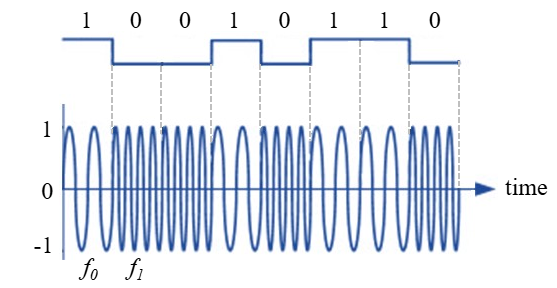

As an aside, note that FM radio uses Frequency Modulation (FM) which is like an analog version of FSK. Instead of having discrete frequencies we jump between, FM radio uses a continuous audio signal to modulate the frequency of the carrier. Below is an example of FM and AM modulation where the “signal” at the top is the audio signal being modulated onto to the carrier.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from IPython.display import Image

# Define a folder name (e.g., inside your current directory)
output_folder = 'output_frames'

# Create the directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# THE OUTPUT HAS BEEN MANUALLY PUT THROUGH COMPRESSION! using https://ezgif.com/optimize

sample_rate = 1e6
carrier_freq = sample_rate * 0.015
data_signal_freq = sample_rate * 0.0015
samples_per_frame = 500
samples_added_per_frame = 5
frames = 134
total_samples = samples_per_frame + (samples_added_per_frame * frames)

# Had to switch to generating the entire time at once or else it causes weird aliasing and sine wave issues

t = np.arange(0, total_samples) / sample_rate

carrier = np.cos(2 * np.pi * carrier_freq * t)
data_signal = np.cos(2 * np.pi * data_signal_freq * t)
am_signal = carrier * (data_signal + 1)

k = 0.5 # sensitivity
phi = 2 * np.pi * carrier_freq * t + k * np.cumsum(data_signal + 1) # phase
fm_signal = np.cos(phi) # modulated signal


sample_indx = 0
filenames = []
for i in range(frames):


    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 7))
    fig.subplots_adjust(hspace=0)
    ax1.plot(carrier[sample_indx:sample_indx+samples_per_frame], 'g-')
    ax1.set_ylabel('Carrier')
    ax1.set_ylim([-1.5, 1.5])

    ax2.plot(data_signal[sample_indx:sample_indx+samples_per_frame], 'k-')
    ax2.set_ylabel('Data Signal')
    ax2.set_ylim([-1.5, 1.5])

    ax3.plot(am_signal[sample_indx:sample_indx+samples_per_frame], 'r-')
    ax3.set_ylabel('AM')
    ax3.set_ylim([-2.5, 2.5])

    ax4.plot(fm_signal[sample_indx:sample_indx+samples_per_frame], 'b-')
    ax4.set_ylabel('FM')
    ax4.set_ylim([-1.5, 1.5])

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xticks([])
    ax1.set_yticks([])
    ax2.set_yticks([])
    ax3.set_yticks([])
    ax4.set_yticks([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['bottom'].set_visible(False)
    ax4.spines['left'].set_visible(False)
    ax4.spines['bottom'].set_visible(False)
    ax1.yaxis.label.set_size(15)
    ax2.yaxis.label.set_size(15)
    ax3.yaxis.label.set_size(15)
    ax4.yaxis.label.set_size(15)

    #plt.show()

    filename = os.path.join(output_folder, 'am_fm_' + str(i) + '.png')
    fig.savefig(filename, bbox_inches='tight')
    filenames.append(filename)
    plt.close(fig)

    sample_indx += samples_added_per_frame


# Create animated gif
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('am_fm_animation.gif', images, fps=20)
Image(filename='am_fm_animation.gif')

## Phase Shift Keying (PSK)

Now let’s consider modulating the phase in a similar manner as we did with the amplitude. The simplest form is Binary PSK, a.k.a. BPSK, where there are two levels of phase:
1. No phase change
2. 180 degree phase change

Example of BPSK (note the phase changes):

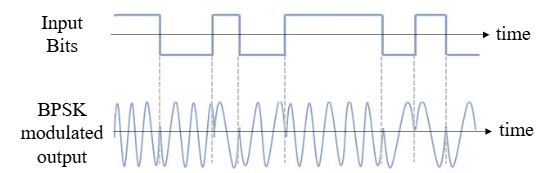

It’s not very fun to look at plots like this:

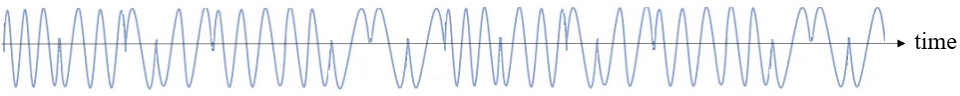

Instead we usually represent the phase in the complex plane.

## IQ Plots/Constellations

As a short Python example, let’s generate QPSK at baseband and plot the constellation.

Even though we could generate the complex symbols directly, let’s start from the knowledge that QPSK has four symbols at 90-degree intervals around the unit circle. We will use 45, 135, 225, and 315 degrees for our points. First we will generate random numbers between 0 and 3 and perform math to get the degrees we want before converting to radians.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_symbols = 1000

x_int = np.random.randint(0, 4, num_symbols) # 0 to 3
x_degrees = x_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
x_radians = x_degrees*np.pi/180.0 # sin() and cos() takes in radians
x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians) # this produces our QPSK complex symbols
plt.plot(np.real(x_symbols), np.imag(x_symbols), '.')
plt.grid(True)
plt.show()

## Quadrature Amplitude Modulation (QAM)

What if we combine ASK and PSK? We call this modulation scheme Quadrature Amplitude Modulation (QAM). QAM usually looks something like this:

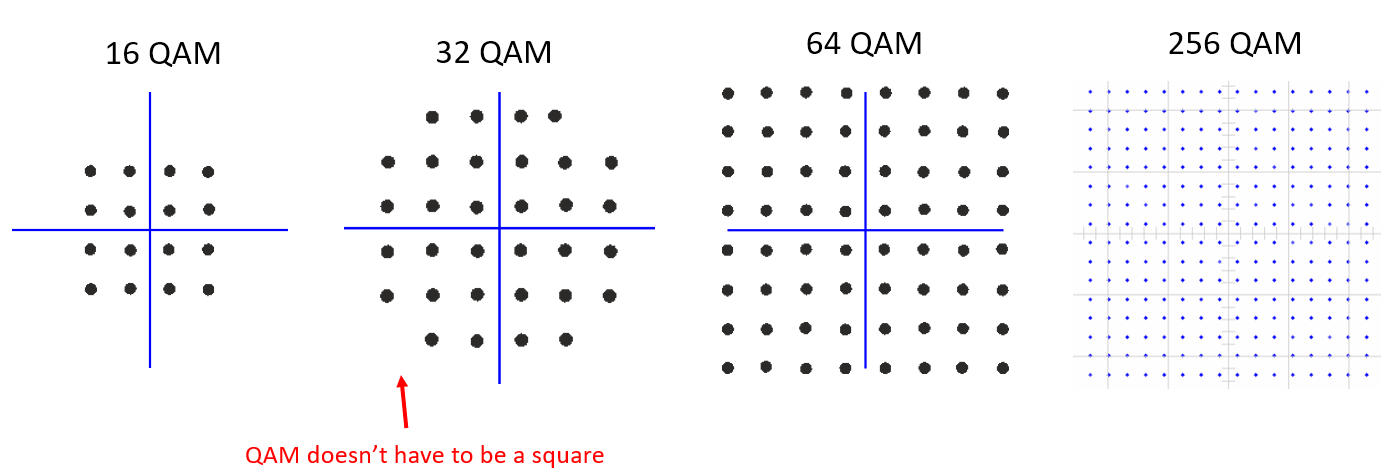
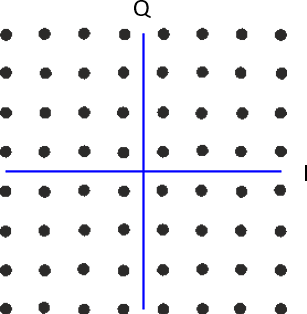

Note that most modulation schemes, except the various ASKs and BPSK, are pretty hard to “see” in the time domain. To prove my point, here is an example of QAM in time domain. Can you distinguish between the phase of each symbol in the below image? It’s tough.

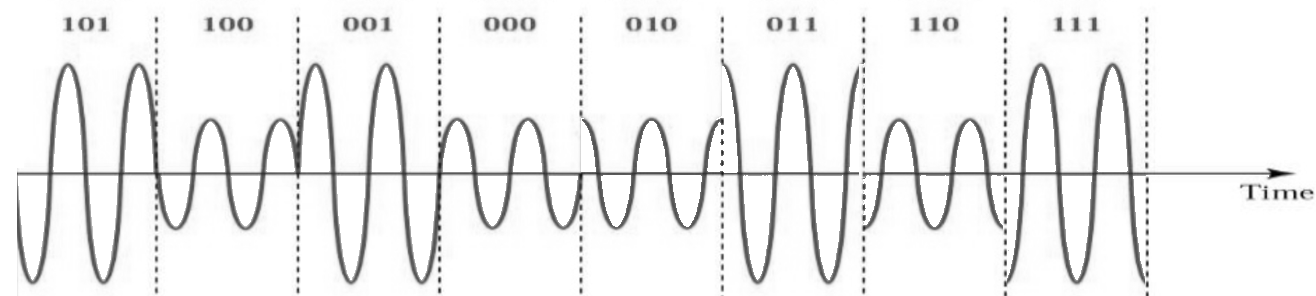
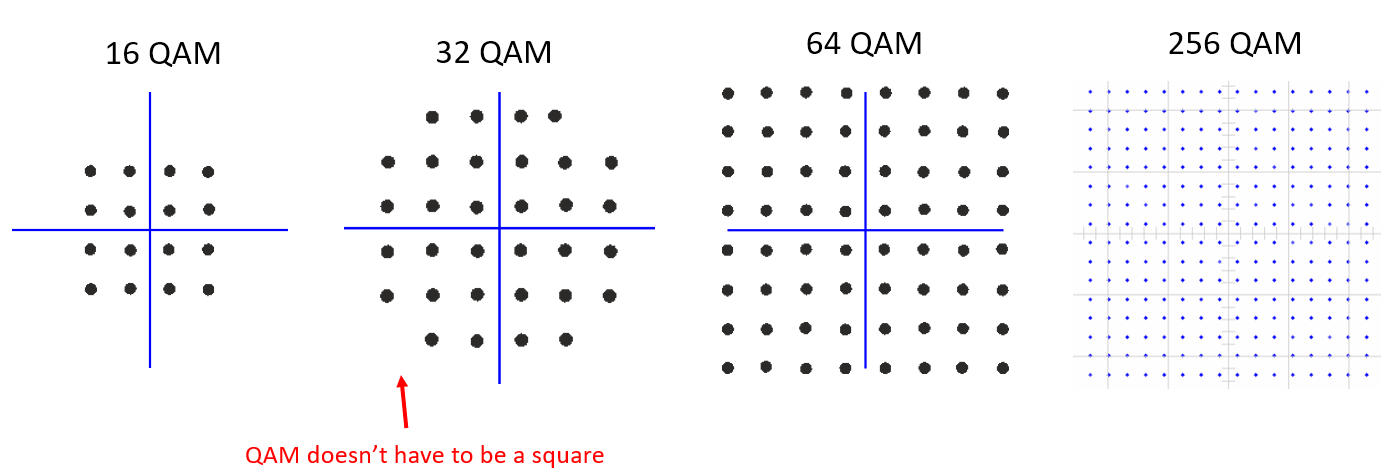

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Parameters ---
M = 16  # Modulation order (16-QAM)
num_symbols = 20  # Number of random symbols to transmit
symbol_rate = 1   # Symbols per second
f_carrier = 4     # Carrier frequency (Hz) - kept low for visualization
fs = 100          # Sampling rate (Hz)

# --- 2. Generate 16-QAM Constellation Points ---
# 16-QAM levels usually are -3, -1, 1, 3
levels = np.array([-3, -1, 1, 3])

# Create the grid of complex points (The Constellation)
# This creates all combinations of (I, Q)
constellation = np.array([x + 1j*y for x in levels for y in levels])

# --- 3. Generate Random Data ---
# Pick random indices (0 to 15)
symbol_indices = np.random.randint(0, M, num_symbols)
# Map indices to complex constellation points
symbols = constellation[symbol_indices]

# Extract I (Real) and Q (Imaginary) parts
I_symbols = np.real(symbols)
Q_symbols = np.imag(symbols)

# --- 4. Modulate (Create Time-Domain Signals) ---
duration = num_symbols / symbol_rate
t = np.arange(0, duration, 1/fs)

# Create the baseband "step" functions (rectangular pulse shaping)
# This repeats the symbol value for the duration of the symbol
I_baseband = np.repeat(I_symbols, fs // symbol_rate)
Q_baseband = np.repeat(Q_symbols, fs // symbol_rate)

# Adjust length if rounding errors occurred
I_baseband = I_baseband[:len(t)]
Q_baseband = Q_baseband[:len(t)]

# Generate Carrier Waves
# Cosine for In-phase (I), Sine for Quadrature (Q)
carrier_I = np.cos(2 * np.pi * f_carrier * t)
carrier_Q = -np.sin(2 * np.pi * f_carrier * t) # Minus sine is standard convention

# Mix (multiply) and Sum
signal_I = I_baseband * carrier_I
signal_Q = Q_baseband * carrier_Q
final_signal = signal_I + signal_Q

# --- 5. Visualization ---
fig = plt.figure(figsize=(12, 10))

# Plot A: Constellation Diagram
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(np.real(constellation), np.imag(constellation), color='lightgray', s=100, label='Ideal Points')
ax1.scatter(I_symbols, Q_symbols, color='red', s=50, label='Transmitted Symbols', zorder=5)
for i, txt in enumerate(levels):
    for j, txt2 in enumerate(levels):
        ax1.text(txt, txt2, f"({txt},{txt2})", fontsize=8, ha='center', va='bottom')
ax1.set_title('16-QAM Constellation Diagram')
ax1.set_xlabel('In-Phase (I)')
ax1.set_ylabel('Quadrature (Q)')
ax1.grid(True, linestyle='--')
ax1.axis('equal')
ax1.legend()

# Plot B: I and Q Baseband Components
ax2 = fig.add_subplot(2, 2, 2)
ax2.step(t, I_baseband, label='I (In-Phase) Data', where='post', color='blue')
ax2.step(t, Q_baseband, label='Q (Quadrature) Data', where='post', color='orange')
ax2.set_title('Baseband Data (Rectangular Pulses)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.grid(True)
ax2.legend()

# Plot C: The Modulated Components
ax3 = fig.add_subplot(2, 1, 2)
ax3.plot(t, final_signal, color='black', linewidth=1.5, label='Final QAM Signal')
ax3.plot(t, I_baseband, color='blue', alpha=0.3, linestyle='--', label='I Data Envelope')
ax3.set_title(f'Time Domain Signal (First {num_symbols} symbols)')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')
ax3.grid(True)
ax3.legend(loc='upper right')
ax3.set_xlim(0, 5) # Zoom in to first 5 seconds for clarity

plt.tight_layout()
plt.show()